In [1]:
import polars as pl
import matplotlib.pyplot as plt 
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
from random import sample
import numpy as np

from functions import recession_figure

# GDP Challenges

In [2]:
data = pl.read_csv("gdp.csv")

data.sample(n=5)

Country Name,Country Code,Year,Value
str,str,i64,f64
"""Suriname""","""SUR""",2013,5.1458e9
"""Bulgaria""","""BGR""",1995,1.8991e10
"""IDA & IBRD total""","""IBT""",1990,3.9382e12
"""Cabo Verde""","""CPV""",2023,2.5873e9
"""IDA & IBRD total""","""IBT""",1970,6.9806e11


## 🗺️ Explore: Try to identify recessions in different countries.

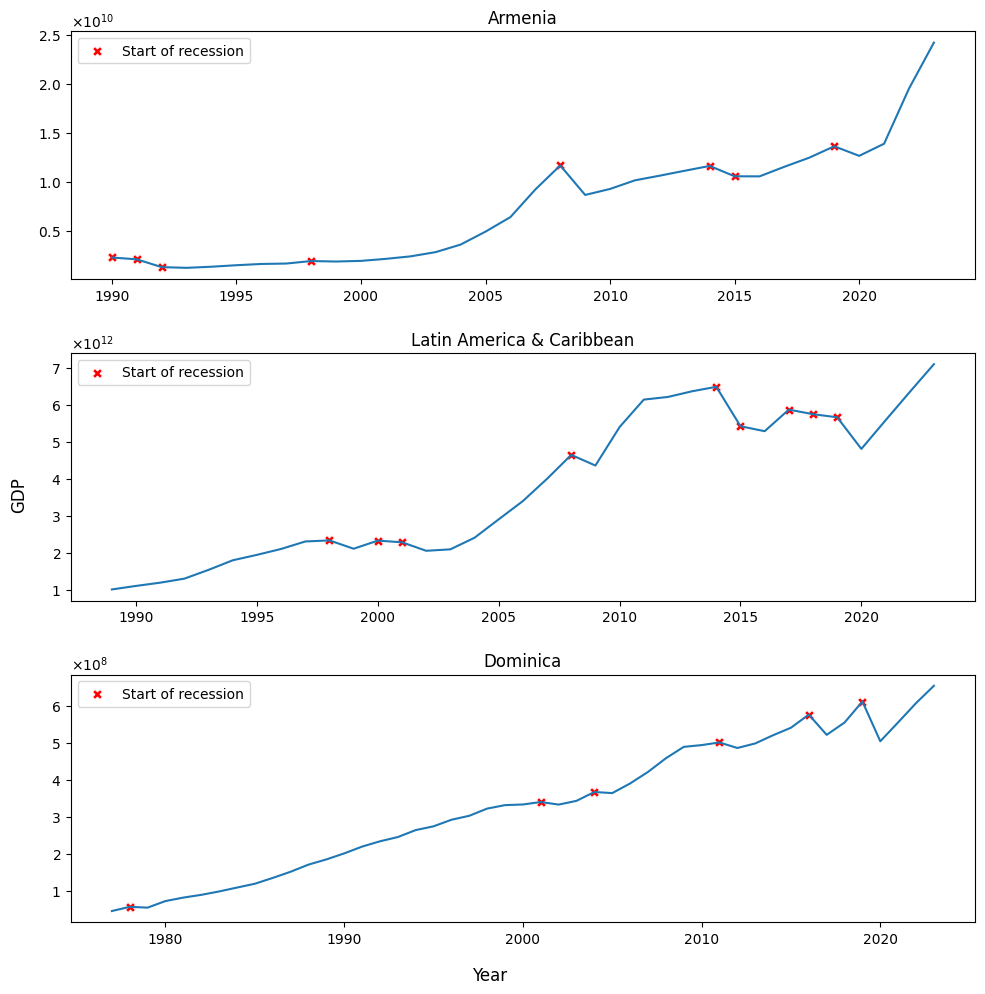

In [3]:
from functions import recession_indicator

rand_countries = sample(data['Country Name'].unique().to_list(), k=3)
recession = data.clone().filter(pl.col('Country Name').is_in(rand_countries))

fig, axes = plt.subplots(3, 1, figsize=(10, 10))

for ax, country in zip(axes, rand_countries):
    
    cdata, crecession = recession_indicator(data, f"{country}")

    sns.lineplot(data=cdata, x="Year", y="Value", ax=ax)
    sns.scatterplot(data=crecession, x="Year", y="Value", color='red', marker='X', s=50, ax=ax, label="Start of recession")    
    
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0, 0))   
    ax.yaxis.set_major_formatter(formatter)
    
    ax.legend(title="")
    ax.set_title(f"{country}")
    ax.set_xlabel("")
    ax.set_ylabel("")

fig.supylabel("GDP")
fig.supxlabel("Year")
plt.tight_layout(h_pad=2)

## 📊 Visualise: Create a plot to visualise the change in GDP in your country over the past decade.

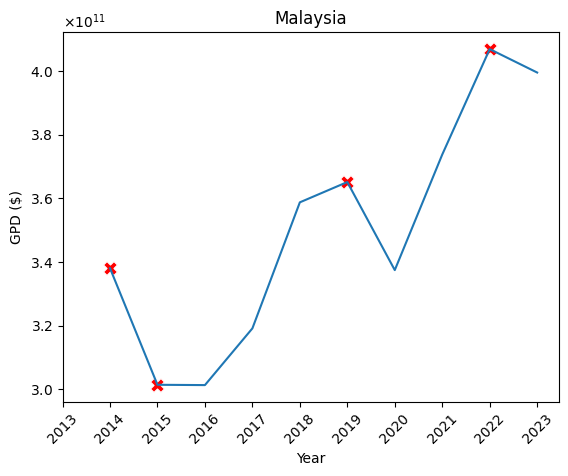

In [4]:
mys = data.clone().filter((pl.col("Country Name") == "Malaysia") & (pl.col("Year") > (pl.col("Year").max().over("Country Name") - 10)))
mys_data, mys_recession = recession_indicator(mys, 'Malaysia')

sns.lineplot(data=mys_data, x="Year", y="Value")
sns.scatterplot(data=mys_recession, x="Year", y="Value", color='red', marker='X', s=100)

plt.title(f"{mys['Country Name'].unique().item()}")
plt.xticks(np.arange(2013, 2024, 1), rotation=45)
plt.ylabel("GPD ($)")

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))   
plt.gca().yaxis.set_major_formatter(formatter)

## 🔎 Analyse: Which country had the highest percentage growth in GDP over the past decade?



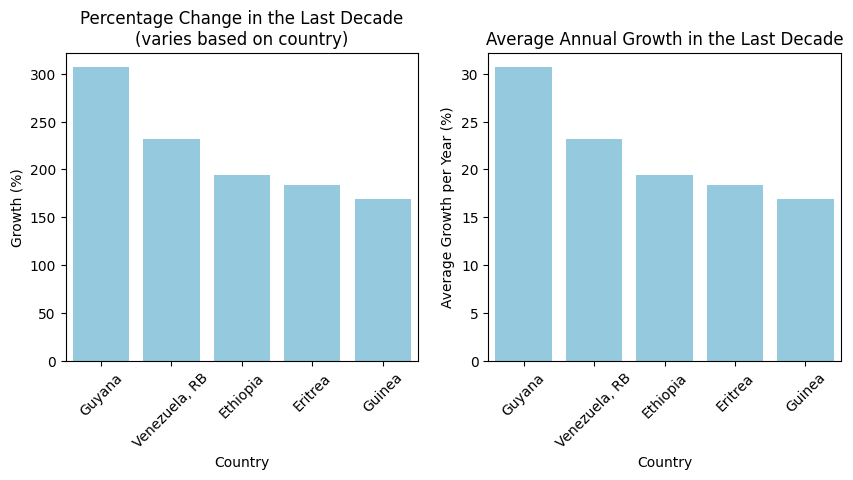

In [5]:
growth = data.clone().drop('Country Code').filter(pl.col("Year") >= (pl.col("Year").max().over("Country Name") - 9)).sort(by=['Country Name', 'Year'])

percent_growth = {}
average_growth = {}

for country in growth['Country Name'].unique().to_list():
    df = growth.filter(pl.col("Country Name") == country)
    max_year = df['Year'].max()
    min_year = df['Year'].min()

    max_year_value = df.filter(pl.col("Year") == max_year)['Value'].item()
    min_year_value = df.filter(pl.col("Year") == min_year)['Value'].item()

    percent_change = ((max_year_value - min_year_value) / min_year_value) * 100

    percent_growth[f'{country}'] = round(percent_change, 2)

    average_growth[f'{country}'] = round(percent_change, 2) / 10


percent_growth_df = pl.DataFrame(
    {
        "Country" : percent_growth.keys(),
        "Growth (%)"  : percent_growth.values()
    }
).sort(by="Growth (%)", descending=True).head()

average_growth_df = pl.DataFrame(
    {
        "Country" : average_growth.keys(),
        "Average Growth per Year (%)" : average_growth.values()
    }
).sort(by="Average Growth per Year (%)", descending=True).head()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(data=percent_growth_df, x="Country", y="Growth (%)", color='skyblue', ax=ax1)
sns.barplot(data=average_growth_df, x="Country", y="Average Growth per Year (%)", color='skyblue', ax=ax2)

ax1.set_title("Percentage Change in the Last Decade\n(varies based on country)")
ax2.set_title("Average Annual Growth in the Last Decade")
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
plt.show()

# GDP Scenario

You are have been hired by an NGO to learn about the economic development of countries in Central America: Belize, Costa Rica, El Salvador, Guatemala, Honduras, Nicaragua, and Panama.

Using data from 1960 through to 2016, you have been asked to give a deep-dive on the GDP growth of each country per year and decade. Your manager is also interested in how each country compares to the regional average.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

In [8]:
data = pl.read_csv("gdp.csv")

data.sample(n=5)

Country Name,Country Code,Year,Value
str,str,i64,f64
"""Kosovo""","""XKX""",2016,6.6827e9
"""Other small states""","""OSS""",1980,2.1041e10
"""Denmark""","""DNK""",2011,3.4400e11
"""Turks and Caicos Islands""","""TCA""",2021,1.0458e9
"""Equatorial Guinea""","""GNQ""",1986,7.6407e7


In [9]:
ca_countries = ['Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Panama']

ca_data = data.clone().filter(
    (pl.col("Country Name").is_in(ca_countries)) & (pl.col('Year') >= 1960) & (pl.col('Year') <= 2016)
)

print(
ca_data['Country Name'].unique().to_list(),
ca_data['Year'].max(),
ca_data['Year'].min(),
sep='\n'
)

['Honduras', 'Belize', 'Guatemala', 'Panama', 'Nicaragua', 'El Salvador', 'Costa Rica']
2016
1960


In [10]:
ca_grouped_data = ca_data.drop('Country Code').group_by(['Country Name', 'Year']).mean().sort(by='Country Name')

for country in ca_countries:
    if ca_grouped_data.filter(pl.col("Country Name") == country)['Year'].shape[0] != 57:
        ca_grouped_data = ca_grouped_data.with_columns(
        pl.col("Country Name").replace({f'{country}': f'{country}*'})
    )

new_ca_countries = ca_grouped_data['Country Name'].unique().sort().to_list()

Text(0.5, 1.0, 'Comparing GDP across six Central\nAmerican countries over time')

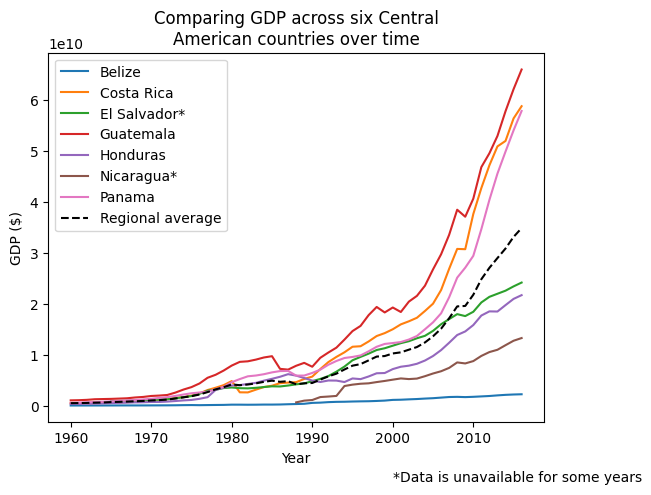

In [11]:
ca_grouped_year_data = ca_data.drop(['Country Name', 'Country Code']).group_by(['Year']).mean().sort(by="Year")

ca_colours = sns.color_palette("bright")

fig, ax = plt.subplots(1, 1)
sns.lineplot(data=ca_grouped_data, x='Year', y='Value', hue='Country Name', ax=ax)
plt.plot(ca_grouped_year_data['Year'], ca_grouped_year_data['Value'], label='Regional average', color='black', linestyle='--')

plt.text(2000, -15e9, '*Data is unavailable for some years')

plt.ylabel("GDP ($)")
plt.legend()
plt.title("Comparing GDP across six Central\nAmerican countries over time")


In [12]:
# Compound Annual Growth Rate (CAGR)
compound_change = {}

for country in new_ca_countries:
    country_data = ca_grouped_data.filter((pl.col("Country Name") == f"{country}"))

    min_year = country_data['Year'].min()
    max_year = country_data['Year'].max()

    min_year_value = country_data.filter(pl.col("Year") == min_year)['Value'].item()
    max_year_value = country_data.filter(pl.col("Year") == max_year)['Value'].item()

    change = ((max_year_value - min_year_value)**(1/(max_year - min_year))) - 1

    compound_change[f'{country}'] = round(change * 100, 2)

In [13]:
compound_change_df = pl.DataFrame(
    {
        "Country" : compound_change.keys(),
        "Percentage"  : compound_change.values()
    }
)

regional_1960 = ca_grouped_year_data.filter(pl.col("Year") == 1960)['Value'].item()
regional_2016 = ca_grouped_year_data.filter(pl.col("Year") == 2016)['Value'].item()

regional_change = round((((regional_2016 - regional_1960)**(1/(2016 - 1960))) - 1) * 100, 2)

Text(4, -45, '*Data is unavailable for some years')

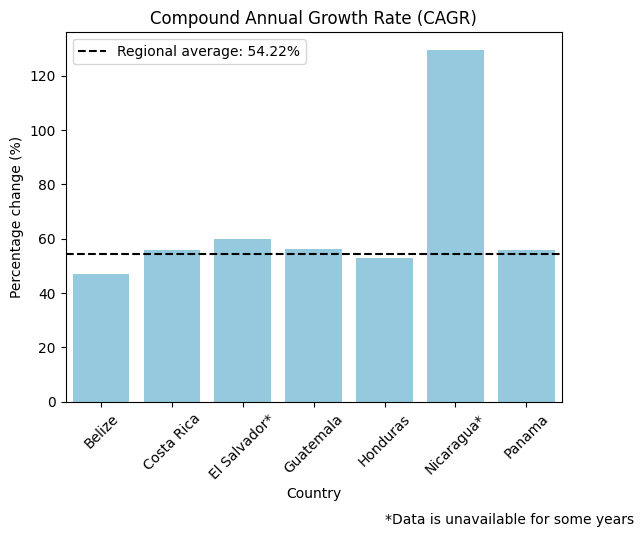

In [14]:
sns.barplot(data=compound_change_df, x="Country", y="Percentage", color='skyblue')
plt.axhline(y=regional_change, color='black', linestyle='--', label=f'Regional average: {regional_change}%')   

plt.xticks(rotation=45)
plt.title("Compound Annual Growth Rate (CAGR)")
plt.ylabel("Percentage change (%)")
plt.legend()

plt.text(4, -45, '*Data is unavailable for some years')

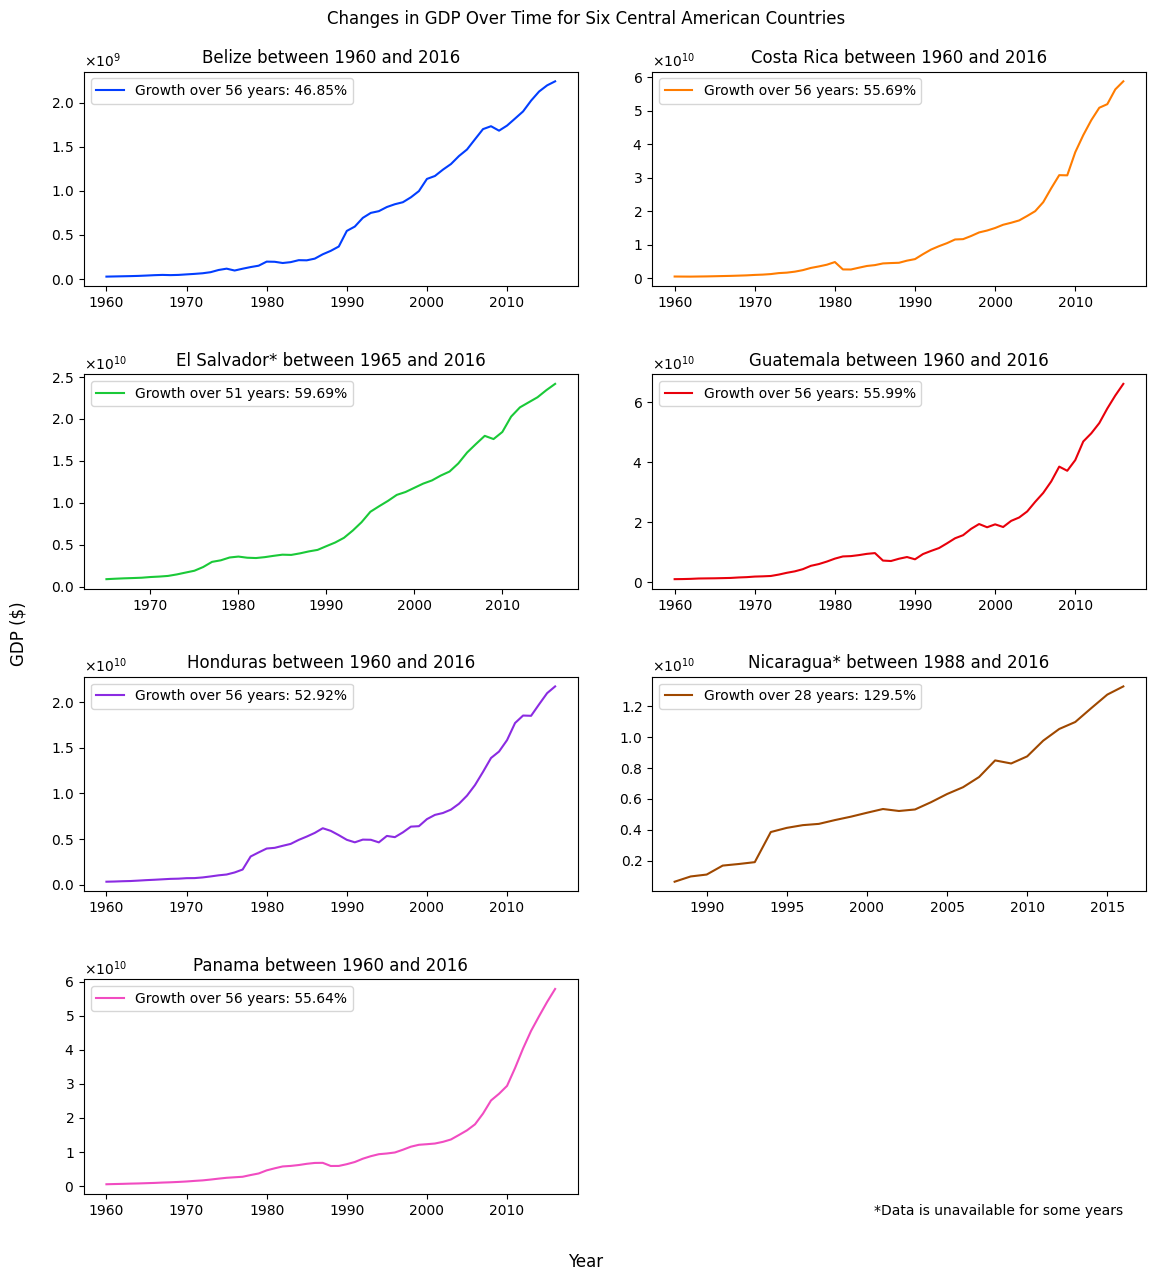

In [15]:
fig, axes = plt.subplots(4, 2, figsize=(12, 13))

zipped_features = zip(
    axes.flatten(), 
    new_ca_countries, 
    ca_colours
)

for ax, country, colour in zipped_features:
    ca = ca_grouped_data.filter(pl.col('Country Name').is_in([f"{country}"]))

    sns.lineplot(
        data=ca,
        x='Year', y='Value', 
        label=f'Growth over {ca['Year'].max() - ca['Year'].min()} years: {compound_change[f"{country}"]}%', 
        ax=ax, color=colour
    )

    ax.set_title(f'{country} between {ca['Year'].min()} and {ca['Year'].max()}')
    
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0, 0))
    ax.yaxis.set_major_formatter(formatter)
    
    ax.set_xlabel("")
    ax.set_ylabel("")

    
axes.flatten()[-1].axis("off")
axes.flatten()[-1].text(0.45, -0.1, '*Data is unavailable for some years')

fig.suptitle("Changes in GDP Over Time for Six Central American Countries")
fig.supxlabel("Year")
fig.supylabel("GDP ($)")
plt.tight_layout(pad=1.7, h_pad=3, w_pad=3)



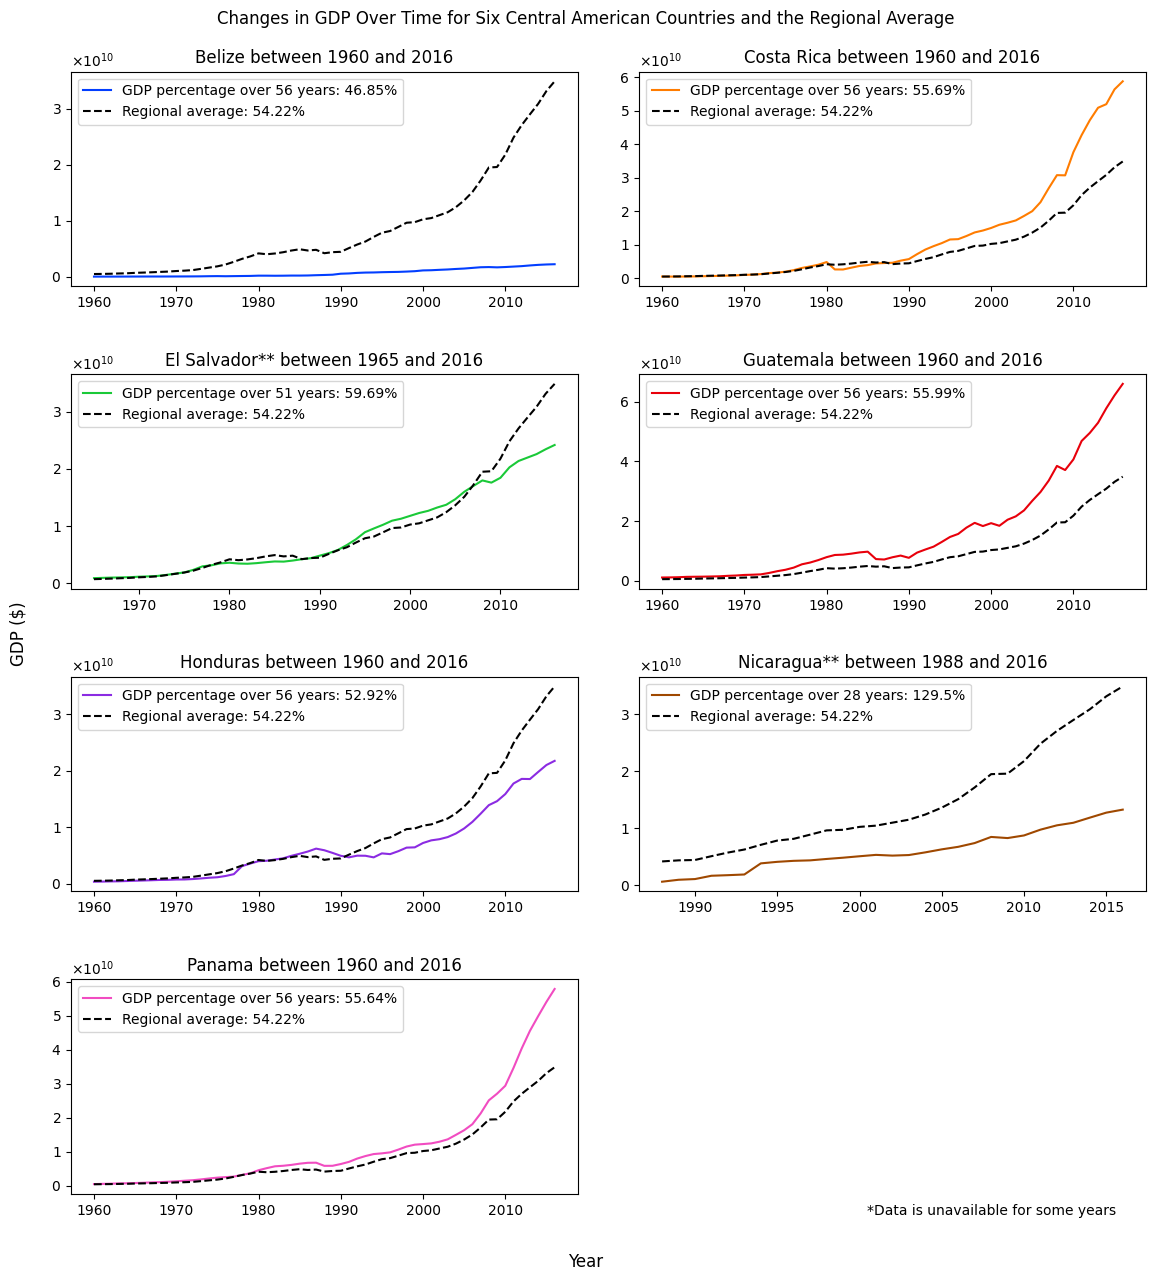

In [16]:
fig, axes = plt.subplots(4, 2, figsize=(12, 13))

zipped_features = zip(
    axes.flatten(), 
    new_ca_countries, 
    ca_colours
)

for ax, country, colour in zipped_features:
    ca = ca_grouped_data.filter(pl.col('Country Name').is_in([f"{country}"]))
    ca_reg = ca_grouped_year_data.filter((pl.col('Year') >= ca['Year'].min()) & (pl.col('Year') <= ca['Year'].max()))

    sns.lineplot(
        data=ca,
        x='Year', y='Value', 
        label=f'GDP percentage over {ca['Year'].max() - ca['Year'].min()} years: {compound_change[f"{country}"]}%', 
        ax=ax, color=colour
    )

    ax.plot(ca_reg['Year'], ca_reg['Value'], label=f'Regional average: {regional_change}%', color='black', linestyle='--')
    ax.legend()

    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0, 0))
    ax.yaxis.set_major_formatter(formatter)

    if ca_reg['Year'].shape[0] != 57:
        ax.set_title(f'{country}* between {ca['Year'].min()} and {ca['Year'].max()}')
    else:
        ax.set_title(f'{country} between {ca['Year'].min()} and {ca['Year'].max()}')
    
    ax.set_xlabel("")
    ax.set_ylabel("")

axes.flatten()[-1].axis("off")
axes.flatten()[-1].text(0.45, -0.1, '*Data is unavailable for some years')

fig.suptitle("Changes in GDP Over Time for Six Central American Countries and the Regional Average")
fig.supxlabel("Year")
fig.supylabel("GDP ($)")
plt.tight_layout(pad=1.7, h_pad=3, w_pad=3)